In [1]:
import numpy as np
import sympy
from sympy import S, symbols, Function, dsolve, solveset, linsolve, integrate, Integral, diff, latex
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
import matplotlib.pyplot as plt

## Занятие 18
## Математический анализ
## Линейные ОДУ второго порядка с постоянными коэффициентами
Решение линейного однородного ОДУ второго порядка с постоянными коэффициентами 
$$
ay''+by'+cy=0
$$
имеет вид:
$$
y=C_1 e^{k_1 x}+C_2 e^{k_2 x}, 
$$
если характеристическое уравнение 
$ak^2+bk+c=0$ 
имеет два различных вещественных корня $k_1$ и $k_2$,
$$
	y=(C_1+C_2 x)e^{k_0 x}, 
$$
 если характеристическое уравнение имеет один вещественный корень $k_0$,
$$
y=e^{\alpha x} (C_1  \cos \beta x+C_2  \sin \beta x ), 
$$    
если характеристическое уравнение  имеет два комплексных корня $k_1=\alpha +i \beta$ и $k_2=\alpha -i \beta$.
### Пример 1
Решением ОДУ
$$
y''-4y'+4y=0
$$
будет
$$
y=(C_1+C_2 x)e^{2 x}, 
$$
поскольку у характеристического уравнения $k^2-4k+4=0$ ровно один корень $k=2$.

In [2]:
x, y, k, C1, C2 = symbols('x y k C_1 C_2')
roots = solveset(k**2 - 4*k + 4)
roots

FiniteSet(2)

Для того, чтобы в символьных преобразованиях в функции $y(x, C_1, C_2)$ использовать экспоненту из sympy, а для численных расчетов (при построении графика в matplotlib.pyplot) из numpy, добавим в эту функцию аргумент lib со значением по умолчанию 'sympy'.

In [3]:
def y(x, C1, C2, lib='sympy'):
    if lib == 'sympy':
        return (C1 + C2*x)*Exp(2*x)
    if lib == 'numpy':
        return (C1 + C2*x)*np.exp(2*x)
    return 'error'

Проверим подстановкой, для этого методом diff найдем производные первого и второго порядка и подставим у ОДУ, упростим выражение с помощью collect по $e^{2x}$.

Выведем также формулу для самой найденной функции $y$, ее первой и второй производной.

In [4]:
display(sympy.collect(diff(y(x, C1, C2), x, 2) - 4*diff(y(x, C1, C2), x) + 4*y(x, C1, C2), Exp(2*x)),
        y(x, C1, C2), diff(y(x, C1, C2), x), diff(y(x, C1, C2), x, 2))

0

(C_1 + C_2*x)*exp(2*x)

C_2*exp(2*x) + 2*(C_1 + C_2*x)*exp(2*x)

4*(C_1 + C_2*x + C_2)*exp(2*x)

Построим график нескольких решений этого ОДУ, для этого положим 

1) $C_1=0$, $C_2=1$;
2) $C_1=1$, $C_2=0$;
3) $C_1=1$, $C_2=-1$

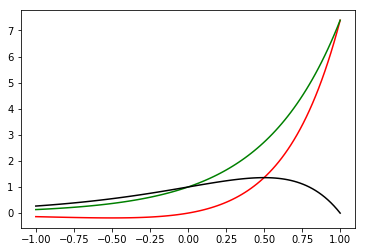

In [5]:
X = np.linspace(-1, 1, 100)
for (c1, c2, col) in ((0, 1, 'red'), (1, 0, 'green'), (1, -1, 'black')):
    plt.plot(X, y(X, c1, c2, lib='numpy'), col)

### Пример 2.
Решим задачу Коши
$$
\left\{
\begin{matrix}
y''-4y'+4y=0\\
y(0)=4\\
y'(0)=12
\end{matrix}
\right.
$$
Вначале опишем производные $y'$ и $y''$ в виде функций $dy(x,C1,C2)$ и  $d2y(x,C1,C2)$

In [6]:
def dy(x, C1, C2):
    return diff(y(x, C1, C2), x)
def d2y(x, C1, C2):
    return diff(y(x, C1, C2), x, 2)
display(dy(x, C1, C2), d2y(x, C1, C2))

C_2*exp(2*x) + 2*(C_1 + C_2*x)*exp(2*x)

4*(C_1 + C_2*x + C_2)*exp(2*x)

Вычислим производные в точке 0, составим и решим систему уравнений относительно С1 и С2:

In [7]:
dy0 = 4
d2y0 = 12
c1, c2 = tuple(linsolve([sympy.Eq(dy(x, C1, C2).subs(x, 0), dy0), sympy.Eq(d2y(x, C1, C2).subs(x, 0), d2y0)], C1, C2))[0]
c1, c2

(1, 2)

Построим график решения задачи Коши, отметим и подпишем начальную точку

Text(30, 50, '$\\frac{d}{d x} y{\\left(x \\right)} = 4$,\n$\\frac{d^{2}}{d x^{2}} y{\\left(x \\right)} = 12$,\n$x = 0$')

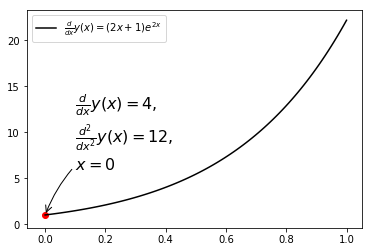

In [8]:
y_abstract = Function('y')(x)
X = np.linspace(0, 1, 100)
label1=latex(sympy.Eq(diff(y_abstract, x), y(x, c1, c2)), mode='inline')
plt.plot(X, y(X, c1, c2, lib='numpy'), color='black', label=label1)
plt.legend()
plt.scatter([0,], [y(0, c1, c2, lib='numpy'),], color='red')
plt.annotate(latex(sympy.Eq(diff(y_abstract, x), dy0), mode='inline') 
             + ',\n' + latex(sympy.Eq(diff(y_abstract, x, 2), d2y0), mode='inline')
             + ',\n' + latex(sympy.Eq(x, 0), mode='inline'),
             xy=(0, y(0, c1, c2)), xycoords='data',
             xytext=(30, +50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

### Пример 3. Решение ОДУ с помощью dsolve

Решим уравнение Примера 1.

#### 1. Объектно-ориентированный подход:
неизвестная функция $y$ описывается как абстрактная функция и используется для записи ОДУ с применением метода diff

In [9]:
y = Function('y')
dsolve(y(x).diff(x, 2) - 4*y(x).diff(x) + 4*y(x), y(x))

Eq(y(x), (C1 + C2*x)*exp(2*x))

#### 2. Функциональный подход:
вызываем функцию diff, передаем ей нашу абстрактную функцию и ее переменную в качестве аргументов,
помним о необязательном аргументе - порядке производной.

In [10]:
res = dsolve(diff(y(x), x, 2) - 4*diff(y(x), x) + 4*y(x), y(x))
res

Eq(y(x), (C1 + C2*x)*exp(2*x))

## Особенности работы с уравнениями в sympy
### Выделение левой и правой части уравнения:

In [11]:
display(res.lhs, res.rhs)

y(x)

(C1 + C2*x)*exp(2*x)

Выделенные части можно дифференцировать, можно делать подстановку:

In [12]:
display(res.rhs.diff(x),res.rhs.diff(x).subs(x,2))

C2*exp(2*x) + 2*(C1 + C2*x)*exp(2*x)

C2*exp(4) + 2*(C1 + 2*C2)*exp(4)

## Выделение символов в выражении
Для того, чтобы выполнять подстановку в решении ОДУ, нужно выделить символы $C_1$ и $C_2$.

Выделение символов осуществляется методом free_symbols, возвращающим МНОЖЕСТВО (set) состоящее из символов

In [13]:
res.rhs.free_symbols

{C1, C2, x}

Построим словарь символов выражения, ключи- имена символов (стороковый тип), значения - сами символы

In [14]:
symb_dict={str(item): item for item in res.rhs.free_symbols}
symb_dict

{'C2': C2, 'x': x, 'C1': C1}

Пользоваться словарем можно так:

в подстановке указываем символ из словаря с нужным именем:

In [15]:
res.subs(symb_dict['C1'], 3)

Eq(y(x), (C2*x + 3)*exp(2*x))

Альтернативный способ (кажется, менее удачный) - преобразование множества в список и упорядочивание списка по алфавиту.

Преобразуем множество в список и используем его для подстановок:

In [16]:
symbs=sorted(list(res.rhs.free_symbols), key=str)
display(symbs)
res.rhs.subs({symbs[0]: 2,symbs[1]: 3})

[C1, C2, x]

(3*x + 2)*exp(2*x)